In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.show()

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
from sklearn import svm
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score, classification_report

In [3]:
df = pd.read_csv('C:\\Users\\singl\\OneDrive\\Documents\\MATLAB\\frontend\\M_TRAIN.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5972 entries, 0 to 5971
Data columns (total 43 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   -0.55307     5972 non-null   float64
 1   -15.772      5972 non-null   float64
 2   3.4207       5972 non-null   float64
 3   0.33526      5972 non-null   float64
 4   0.89613      5972 non-null   float64
 5   0.088091     5972 non-null   float64
 6   0.41567      5972 non-null   float64
 7   0.1267       5972 non-null   float64
 8   0.13255      5972 non-null   float64
 9   0.33759      5972 non-null   float64
 10  0.02388      5972 non-null   float64
 11  0.14724      5972 non-null   float64
 12  -0.012345    5972 non-null   float64
 13  0.065987     5972 non-null   float64
 14  -0.0051918   5972 non-null   float64
 15  -0.0681      5972 non-null   float64
 16  0.0098545    5972 non-null   float64
 17  0.0016494    5972 non-null   float64
 18  0.0024727    5972 non-null   float64
 19  0.0012

In [4]:
x_train = df.iloc[:, 0:42].values
y_train = df.iloc[:,-1].values

In [5]:
y_train=y_train.astype(int)

In [6]:
gnb = GaussianNB()

In [7]:
gnb.fit(x_train,y_train)

GaussianNB()

In [8]:
df = pd.read_csv('C:\\Users\\singl\\OneDrive\\Documents\\MATLAB\\frontend\\M_TEST.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 43 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   -0.61543     5460 non-null   float64
 1   -16.014      5460 non-null   float64
 2   3.4098       5460 non-null   float64
 3   0.47797      5460 non-null   float64
 4   1.0294       5460 non-null   float64
 5   -0.089357    5460 non-null   float64
 6   0.46573      5460 non-null   float64
 7   0.029168     5460 non-null   float64
 8   0.14766      5460 non-null   float64
 9   0.35773      5460 non-null   float64
 10  0.0048383    5460 non-null   float64
 11  0.10242      5460 non-null   float64
 12  -0.06141     5460 non-null   float64
 13  0.17928      5460 non-null   float64
 14  -0.0052878   5460 non-null   float64
 15  -0.068714    5460 non-null   float64
 16  0.010755     5460 non-null   float64
 17  0.0020407    5460 non-null   float64
 18  0.0034614    5460 non-null   float64
 19  0.0021

In [10]:
x_test = df.iloc[:, 0:42].values
y_test = df.iloc[:,-1].values
y_test

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [11]:
# y_test=y.astype(int)
# y_test

In [12]:
y_pred=gnb.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [13]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))
print(classification_report(y_test, y_pred))

The Accuracy for Test Set is 50.8974358974359
              precision    recall  f1-score   support

           0       0.34      0.58      0.43       509
           1       0.56      0.49      0.52      2474
           2       0.53      0.51      0.52      2477

    accuracy                           0.51      5460
   macro avg       0.47      0.53      0.49      5460
weighted avg       0.52      0.51      0.51      5460



<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Confusion Matrix')

<AxesSubplot:title={'center':'Confusion Matrix'}>

Text(87.0, 0.5, 'Actual Values')

Text(0.5, 33.0, 'Predicted Values')

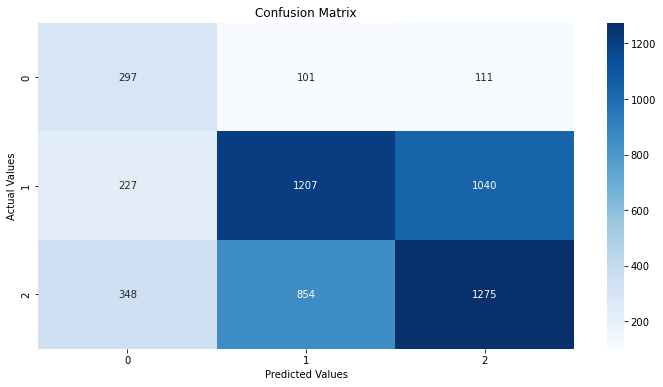

In [14]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import numpy as np
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test,y_pred, pos_label=1)
fnr = 1 - tpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
EER = fnr[np.nanargmin(np.absolute((fnr - fpr)))]
print(eer_threshold)
print("EER = ", EER)

2
EER =  0.5796281325788197
